In [2]:
from pydataset import data

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df_full = data('sunspot.year')
time_series = df_full[df_full['time'] <= 1800].copy()

In [4]:

time_series['time'] = pd.to_datetime(time_series['time'], format="%Y")

time_series.set_index('time', inplace=True)

time_series = time_series.asfreq('YS')

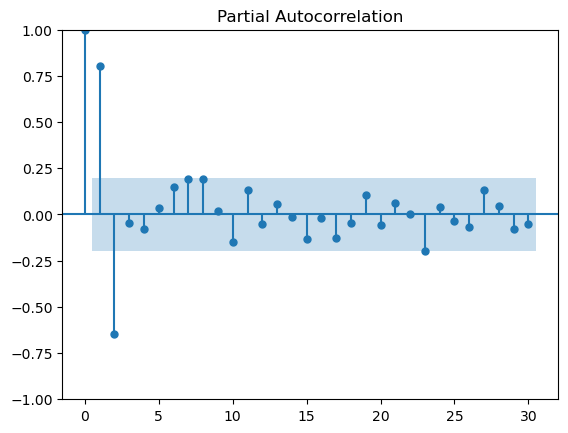

In [5]:
sm.graphics.tsa.plot_pacf(time_series, lags=30)
plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(2,0,0))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           sunspot.year   No. Observations:                  101
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -421.234
Date:                Wed, 28 Aug 2024   AIC                            850.469
Time:                        09:37:44   BIC                            860.929
Sample:                    01-01-1700   HQIC                           854.703
                         - 01-01-1800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3837      5.752      7.890      0.000      34.109      56.658
ar.L1          1.3509      0.062     21.835      0.000       1.230       1.472
ar.L2         -0.6662      0.075     -8.921      0.0

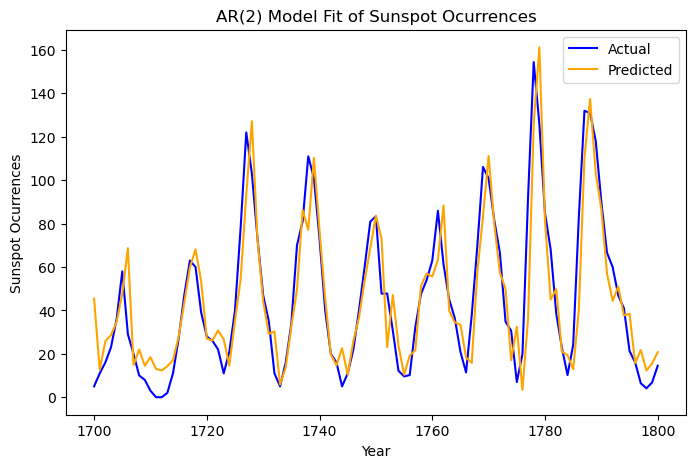

In [7]:
fitted_values = results.fittedvalues

plt.figure(figsize=(8, 5))

plt.plot(time_series, label='Actual', color='blue')
plt.plot(time_series.index, fitted_values, label='Predicted', color='orange')

plt.title('AR(2) Model Fit of Sunspot Ocurrences')
plt.xlabel('Year')
plt.ylabel('Sunspot Ocurrences')
plt.legend()

plt.show()

In [9]:
ts_huron = data('LakeHuron')

ts_huron['time'] = pd.to_datetime(ts_huron['time'], format="%Y")
ts_huron.set_index('time', inplace=True)
ts_huron = ts_huron.asfreq('YS')


In [10]:
ts_huron.head()

,LakeHuron
time,
1875-01-01,580.38
1876-01-01,581.86
1877-01-01,580.97
1878-01-01,580.80
1879-01-01,579.79


In [20]:
from statsmodels.tsa.stattools import adfuller

adfuller(ts_huron)[1]

0.0020520736790757706

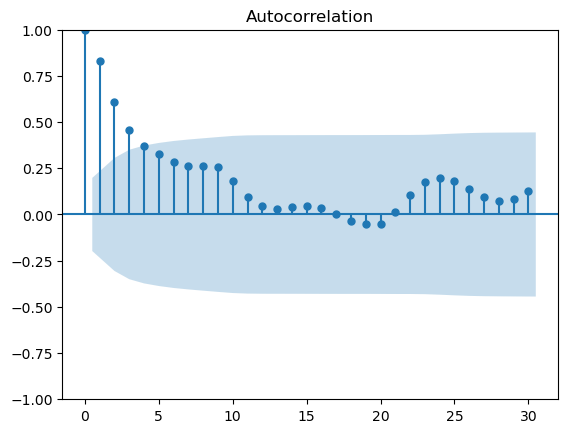

In [13]:
sm.graphics.tsa.plot_acf(ts_huron, lags=30)
plt.savefig('acf_huron.png')

In [17]:
model_huron = ARIMA(ts_huron, order=(0,0,2))
results_huron = model_huron.fit()

print(results_huron.summary())

                               SARIMAX Results                                
Dep. Variable:              LakeHuron   No. Observations:                   98
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -111.465
Date:                Wed, 28 Aug 2024   AIC                            230.931
Time:                        10:05:51   BIC                            241.270
Sample:                    01-01-1875   HQIC                           235.113
                         - 01-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        579.0130      0.195   2962.352      0.000     578.630     579.396
ma.L1          1.0174      0.089     11.450      0.000       0.843       1.192
ma.L2          0.5008      0.101      4.969      0.0

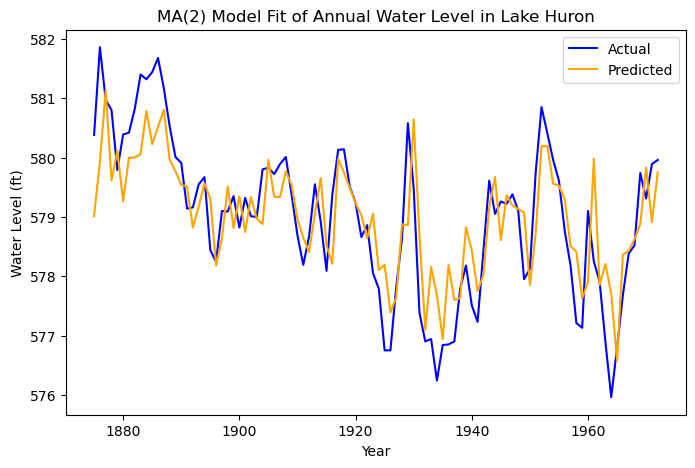

In [19]:
fitted_values_huron = results_huron.fittedvalues

plt.figure(figsize=(8, 5))

plt.plot(ts_huron, label='Actual', color='blue')
plt.plot(ts_huron.index, fitted_values_huron, label='Predicted', color='orange')

plt.title('MA(2) Model Fit of Annual Water Level in Lake Huron')
plt.xlabel('Year')
plt.ylabel('Water Level (ft)')
plt.legend()

plt.savefig('ma_huron')

In [33]:
model_huron_arima = ARIMA(ts_huron, order=(1,0,2))
results_huron_arima = model_huron_arima.fit()

print(results_huron_arima.summary())

                               SARIMAX Results                                
Dep. Variable:              LakeHuron   No. Observations:                   98
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -103.232
Date:                Wed, 28 Aug 2024   AIC                            216.465
Time:                        10:55:14   BIC                            229.389
Sample:                    01-01-1875   HQIC                           221.692
                         - 01-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        579.0522      0.356   1624.669      0.000     578.354     579.751
ar.L1          0.7304      0.123      5.918      0.000       0.489       0.972
ma.L1          0.3406      0.143      2.374      0.0

In [34]:
wald = results_huron_arima.wald_test(np.eye(5), scalar=True)

print(wald)

<Wald test (chi2): statistic=2813875.0424544676, p-value=0.0, df_denom=5>


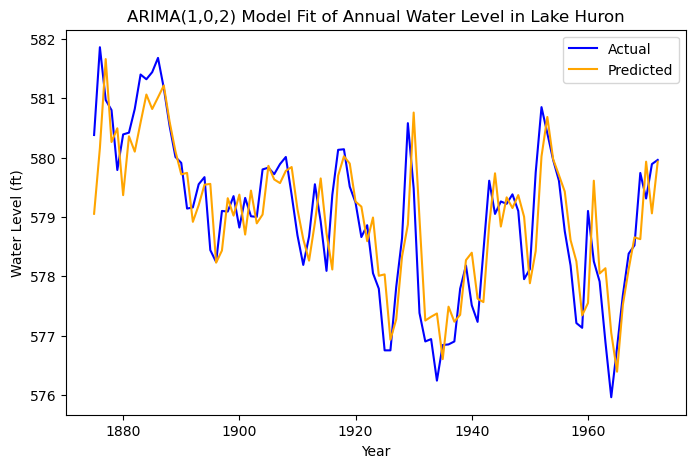

In [35]:
fitted_values_huron_arima = results_huron_arima.fittedvalues

plt.figure(figsize=(8, 5))

plt.plot(ts_huron, label='Actual', color='blue')
plt.plot(ts_huron.index, fitted_values_huron_arima, label='Predicted', color='orange')

plt.title('ARIMA(1,0,2) Model Fit of Annual Water Level in Lake Huron')
plt.xlabel('Year')
plt.ylabel('Water Level (ft)')
plt.legend()

plt.savefig('arima_huron')